In [1]:
import numpy as np
from matplotlib import pylab as plt

In [2]:
def symplectic_euler(force, init, tspan):
    h = tspan[0] - tspan[1]
    hsqhalf = h ** 2 / 2.0

    mid = len(init) // 2

    sol = np.empty([len(tspan), len(init)], dtype=np.float64)
    sol[0] = np.asarray(init)

    for i, t in enumerate(tspan[:-1]):
        x = sol[i][:mid]
        p = sol[i][mid:]
        pnew = p + h * force(x, p, t)
        xnew = x + h * pnew
        sol[i + 1][:mid] = xnew
        sol[i + 1][mid:] = pnew

    return sol


def leapfrog(force, init, tspan):
    h = tspan[0] - tspan[1]
    hsqhalf = h ** 2 / 2.0

    mid = len(init) // 2

    sol = np.empty([len(tspan), len(init)], dtype=np.float64)
    sol[0] = np.asarray(init)

    for i, t in enumerate(tspan[:-1]):
        x = sol[i][:mid]
        p = sol[i][mid:]
        xnew = x + h * p + hsqhalf * force(x, p, t)
        pnew = p + h * (force(x, p, t) + force(xnew, p, t + h)) / 2.0
        sol[i + 1][:mid] = xnew
        sol[i + 1][mid:] = pnew

    return sol

In [3]:
class Kepler:
    def __init__(self, gamma):
        self.gamma = gamma

    def energy(self, q, p):
        return 0.5 * np.linalg.norm(p, ord=2) ** 2 + self.gamma / np.linalg.norm(q, ord=2)
    
    def force(self, q, p):
        return -q * self.gamma / np.linalg.norm(q, ord=2) ** 3

In [4]:
k = Kepler(1)

e = 0.6
init_ecc = lambda e: np.asarray([1.0 - e, 0.0, 0.0, np.sqrt((1 + e) / (1 - e))])
init = init_ecc(e)

In [5]:
tspan = np.arange(0, 1000, 0.1)

In [6]:
sol_e = symplectic_euler(lambda x, p, t: k.force(x,p), init, tspan)
sol_l = leapfrog(lambda x, p, t: k.force(x,p), init, tspan)

In [7]:
tspan_better = np.arange(0, 1000, 0.005)
sol_l_better = leapfrog(lambda x, p, t: k.force(x,p), init, tspan_better)

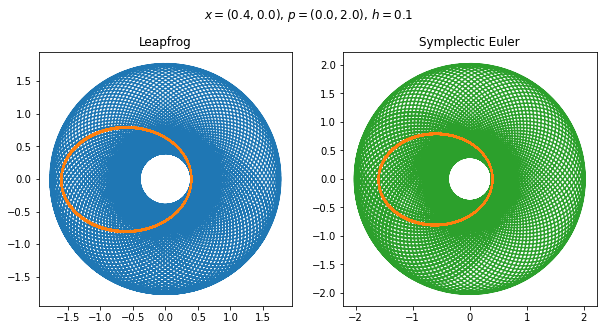

In [8]:
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"$x = ({init[:2][0]:.2}, {init[:2][1]:.2})$, $p = ({init[2:][0]:.2}, {init[2:][1]:.2})$, $h = 0.1$")

ax = plt.subplot(121)
ax.set_title("Leapfrog")
ax.set_aspect("equal")
ax.plot(sol_l[:,0], sol_l[:,1], c="C0")
ax.plot(sol_l_better[:,0], sol_l_better[:,1], c="C1")

ax = plt.subplot(122)
ax.set_title("Symplectic Euler")
ax.set_aspect("equal")
ax.plot(sol_e[:,0], sol_e[:,1], c="C2")
ax.plot(sol_l_better[:,0], sol_l_better[:,1], c="C1")

plt.show()

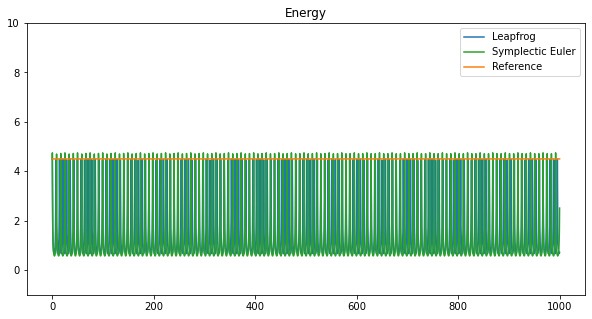

In [10]:
fig = plt.figure(figsize=(10,5))
plt.title("Energy")
plt.plot(tspan, [k.energy(s[:2], s[2:]) for s in sol_l], c="C0", label="Leapfrog")
plt.plot(tspan, [k.energy(s[:2], s[2:]) for s in sol_e], c="C2", label="Symplectic Euler")
# plt.plot(tspan_better, [k.energy(s[:2], s[2:]) for s in sol_l_better], c="C1")
plt.plot(tspan, [k.energy(init[:2], init[2:]) for _ in tspan], c="C1", label="Reference")
plt.ylim(-1, 10)
plt.legend()
plt.show()